### 素数定理
$$
\pi(x) = x \ \text{以下の素数の個数}
$$
$$
\mathrm{Li}(x) := \int_2^x \frac{dt}{\log(t)} = \mathrm{li}(x) - \mathrm{li}(2) 
$$
とすると、
$$
\pi(x) \sim \mathrm{Li}(x)
$$

実装してみよう。

In [2]:
## 素数判定
is_prime(n) = n > 1 && all(n % i != 0 for i in 2:sqrt(n))

## 素数計数関数
function prime_counting(n)
    count = 0
    for i in 1:floor(n)
        if is_prime(i)
            count += 1
        end
    end
    return count
end

prime_counting (generic function with 1 method)

In [ ]:
primes = [i for i in 1:10000000 if is_prime(i)]

In [28]:
prime_counting(100000)

9592

$$
\begin{align*}
\mathrm{Li}(x) &= \int_2^x \frac{dt}{\ln t} = \mathrm{li}(x) - \mathrm{li}(2) \\
&= \mathrm{Ei}(\ln x) - \mathrm{Ei}(\ln 2)
\end{align*}
$$

特殊関数のライブラリ `SpecialFunctions.jl`を導入する。

In [5]:
using Pkg
Pkg.add("SpecialFunctions")
import SpecialFunctions.expinti

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/developments/math-exp/Project.toml`
  No Changes to `~/developments/math-exp/Manifest.toml`


In [3]:
function Li(x)
    expinti(log(x)) - expinti(log(2))
end

Li (generic function with 1 method)

In [25]:
Li(100000000)

5.762208330284273e6

グラフにプロットしてみよう。

In [6]:
Pkg.add("Plots")
using Plots

   Resolving package versions...


  No Changes to `~/developments/math-exp/Project.toml`
  No Changes to `~/developments/math-exp/Manifest.toml`


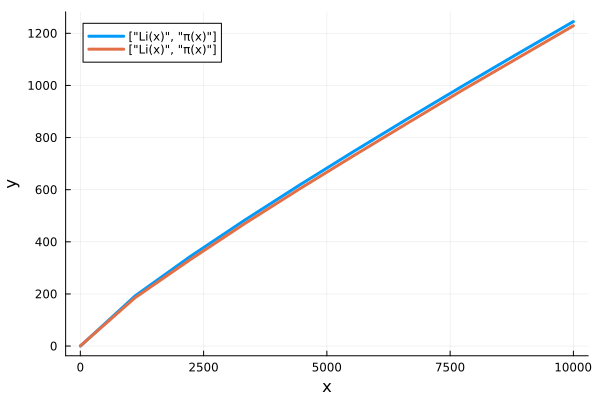

In [7]:
x = range(2, 10^4, length=10)
y1 = Li.(x)
y2 = prime_counting.(x)
plot(x, [y1, y2], titel="Li(x) vs π(x)", label=["Li(x)", "π(x)"], xlabel="x", ylabel="y", lw=3)